In [1]:
#IMPORT AND FUNCTIONS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder      
from statistics import mean
import joblib 
import seaborn as sns

In [2]:
# GET THE DATA . LOAD DATA
wine = pd.read_csv('./winequality_train_set.csv')

In [3]:
# Quick view of the data
print('\n____________ Dataset info ____________')
print(wine.info())


____________ Dataset info ____________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3570 entries, 0 to 3569
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  3570 non-null   object 
 1   fixed acidity         3562 non-null   float64
 2   volatile acidity      3564 non-null   float64
 3   citric acid           3568 non-null   float64
 4   residual sugar        3568 non-null   float64
 5   chlorides             3568 non-null   float64
 6   free sulfur dioxide   3570 non-null   float64
 7   total sulfur dioxide  3570 non-null   float64
 8   density               3570 non-null   float64
 9   pH                    3564 non-null   float64
 10  sulphates             3568 non-null   float64
 11  alcohol               3570 non-null   float64
 12  quality               3570 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 362.7+ KB
None


In [4]:
# Có nhiều feature bị khuyết như: fixed acidity,volatile acidity...
# Hầu hết data có kiểu dữ liệu là float, trừ feature type có kiểu dữ liệu là string
# và feature quality có kiểu dữ liệu là int
# Dữ liệu yêu cầu 362,7+ KB bộ nhớ

In [5]:
#Exploratory Data Analysis
#Data Manipulation

In [4]:
#In 3 dòng đầu của dữ liệu
print('\n____________ Some first data examples ____________')
print(wine.head(3)) 


____________ Some first data examples ____________
    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  


In [5]:
print(wine['quality'].value_counts()) 

quality
6    1534
5    1090
7     651
8     144
4     128
3      18
9       5
Name: count, dtype: int64


In [6]:
wine.shape
# dữ liệu có 3570 samples và 13 features
print("Number of samples: ", wine.shape[0])
print("Number of features: ", wine.shape[1])

Number of samples:  3570
Number of features:  13


In [7]:
# Kiểm tra NULL trong dataset
wine.isna().sum()

type                    0
fixed acidity           8
volatile acidity        6
citric acid             2
residual sugar          2
chlorides               2
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      6
sulphates               2
alcohol                 0
quality                 0
dtype: int64

In [9]:
## Missing Value Handling
# Fill Null data with mean value of each feature
#Replace the missing the values with the column mean
missing_val_cols = ["fixed acidity", "pH", "volatile acidity", "sulphates", "citric acid", "residual sugar", "chlorides"]
for col in missing_val_cols:
    mean = wine[col].mean()
    wine[col].fillna(mean, inplace=True)

In [11]:
# Kiểm tra lại Null value
# Kiểm tra NULL trong dataset
wine.isna().any()
#Null value đã được fill

type                    False
fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [13]:
#Thống kê dataset
print('\n____________ Statistics of numeric features ____________')
print(wine.describe())   


____________ Statistics of numeric features ____________
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    3570.000000       3570.000000  3570.000000     3570.000000   
mean        6.993248          0.275671     0.345107        6.329807   
std         0.851376          0.100815     0.123496        5.096654   
min         4.200000          0.080000     0.000000        0.600000   
25%         6.400000          0.210000     0.280000        1.700000   
50%         6.900000          0.260000     0.330000        5.100000   
75%         7.500000          0.320000     0.400000        9.800000   
max        14.200000          1.005000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  3570.000000          3570.000000           3570.000000  3570.000000   
mean      0.045742            35.507003            141.685994     0.994281   
std       0.021989            16.803413             43.726398     0.

In [14]:
wine.head(3)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [15]:
#Data features
wine.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

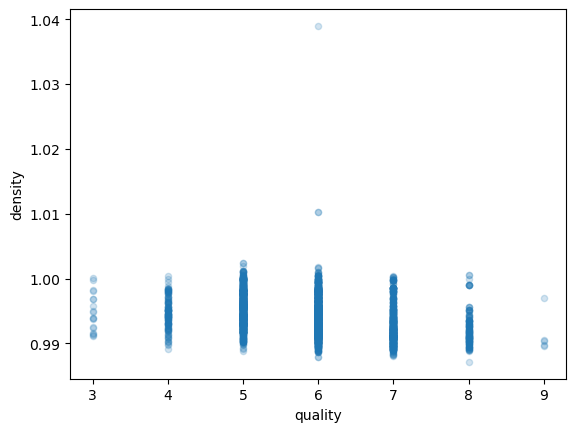

In [16]:
## Scatter plot between 2 features density and quality
wine.plot(kind="scatter", y="density", x="quality", alpha=0.2)
plt.savefig('figures/scatter_1_feat.png', format='png', dpi=300)
plt.show() 

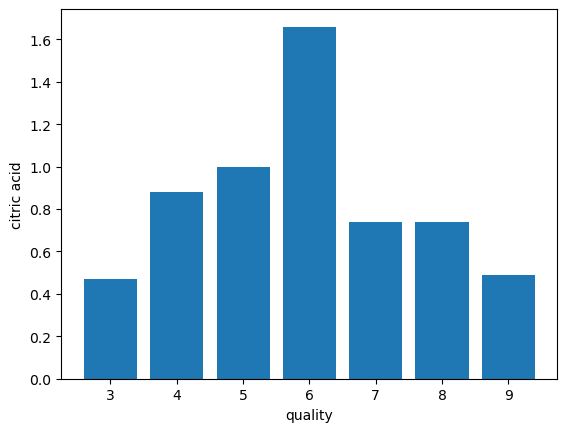

In [17]:
##  Citric acid vs quality
plt.bar(wine['quality'],wine['citric acid'])
plt.xlabel('quality')
plt.ylabel('citric acid')
plt.show()

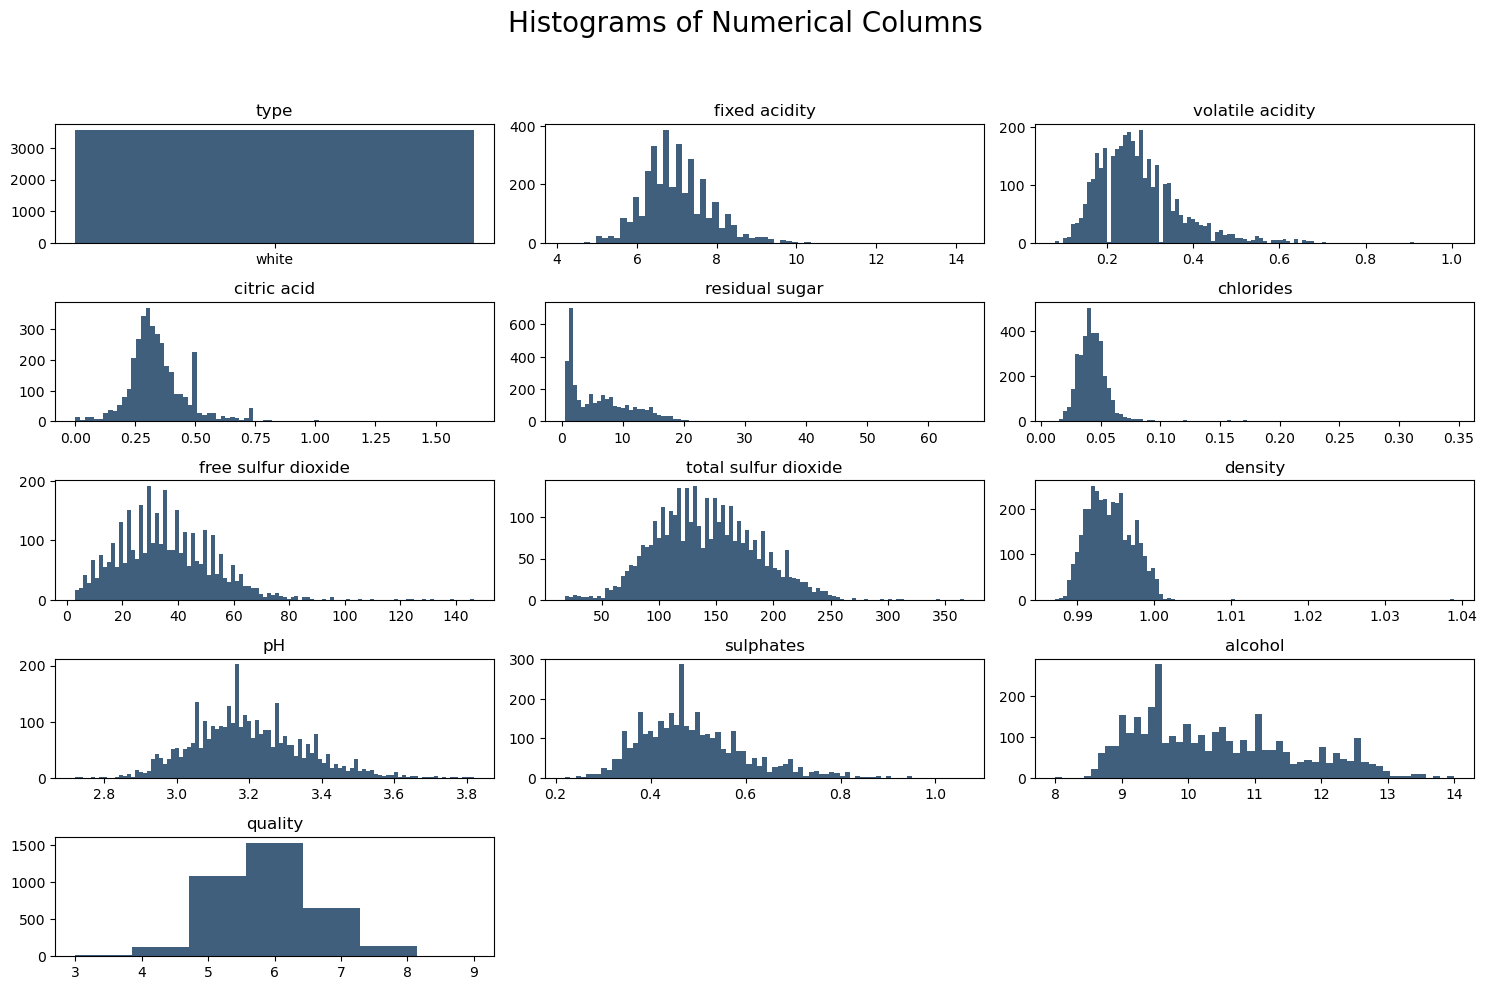

In [18]:
# Plot histogram of features
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(wine.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(wine.columns.values[i])

    vals = np.size(wine.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    plt.hist(wine.iloc[:, i], bins=vals, color='#3F5F7D')
plt.savefig('figures/hist_feat.png', format='png', dpi=300)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

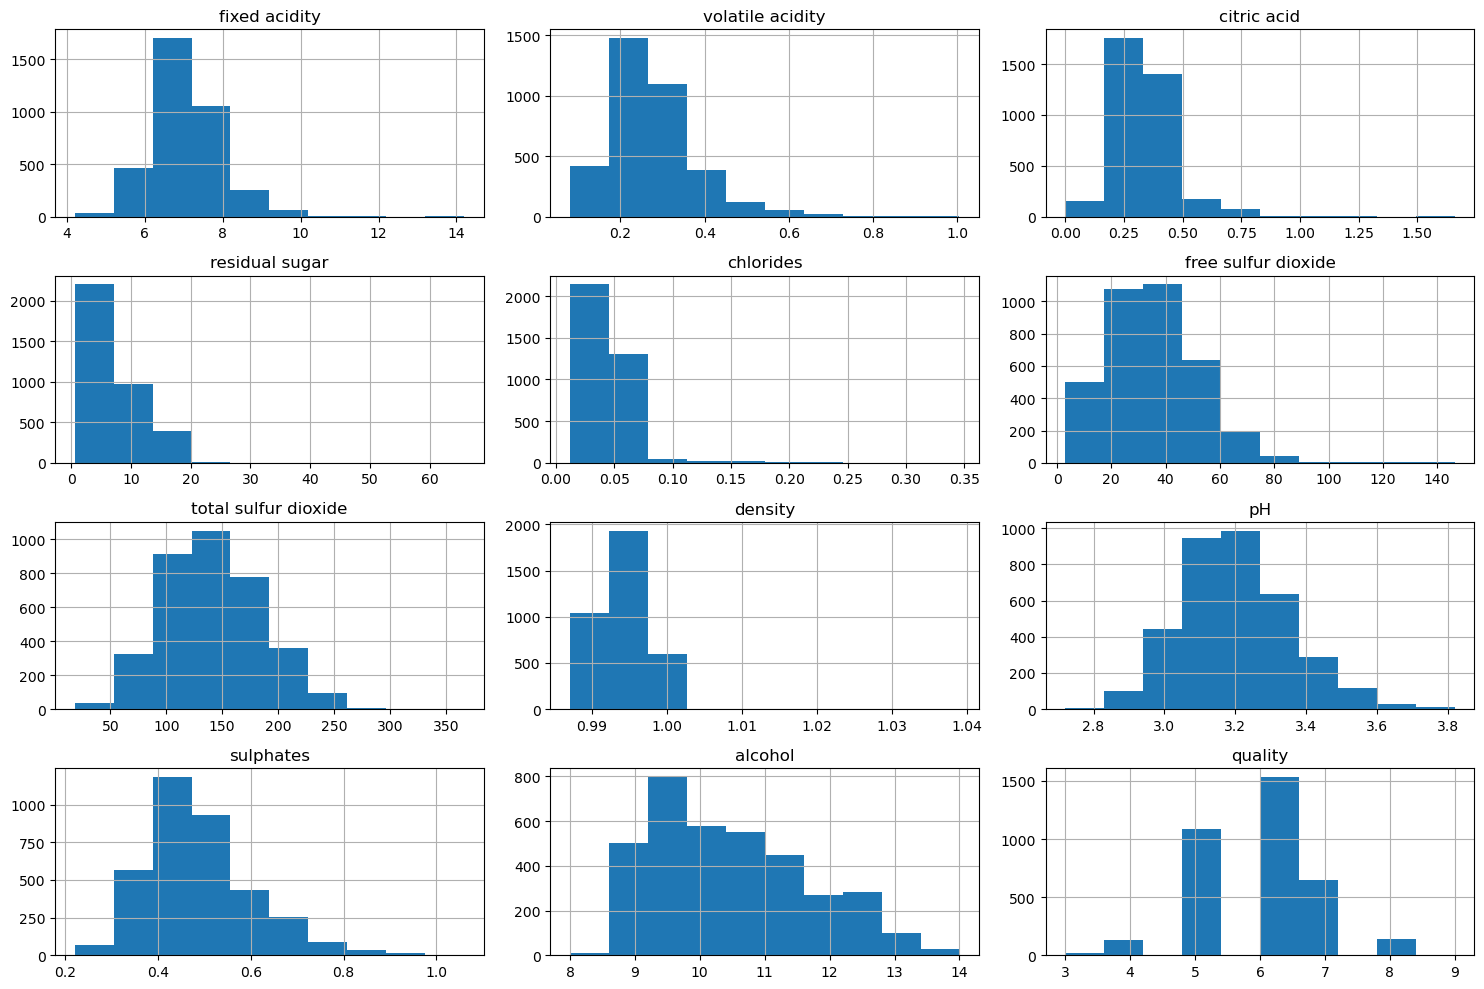

In [19]:
# Plot histogram of numeric features
wine.hist(figsize=(15,10)) #bins: no. of intervals
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.tight_layout()
plt.savefig('figures/hist_raw_data.png', format='png', dpi=300) # must save before show()
plt.show()

In [20]:
# Vì dữ liệu tất cả dữ liệu type đều là red nên ta có thể drop feature type để giảm độ nhiễu dữ liệu
wine.drop(columns='type',inplace = True)

In [21]:
wine.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6


In [24]:
#Compute correlations b/w features
corr_matrix = wine.corr()
print(corr_matrix) # print correlation matrix
print('\n',corr_matrix["quality"].sort_values(ascending=False))

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.015296     0.277539   
volatile acidity           0.015296          1.000000    -0.120025   
citric acid                0.277539         -0.120025     1.000000   
residual sugar             0.086729          0.105998     0.128657   
chlorides                  0.004043          0.083972     0.096989   
free sulfur dioxide       -0.070999         -0.095763     0.088221   
total sulfur dioxide       0.051135          0.107685     0.095175   
density                    0.231300          0.081777     0.152947   
pH                        -0.445082         -0.088006    -0.189694   
sulphates                 -0.024813         -0.048314     0.043807   
alcohol                   -0.057122          0.018062    -0.055656   
quality                   -0.120125         -0.196979    -0.015512   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

<Axes: title={'center': 'Correlation with quality'}>

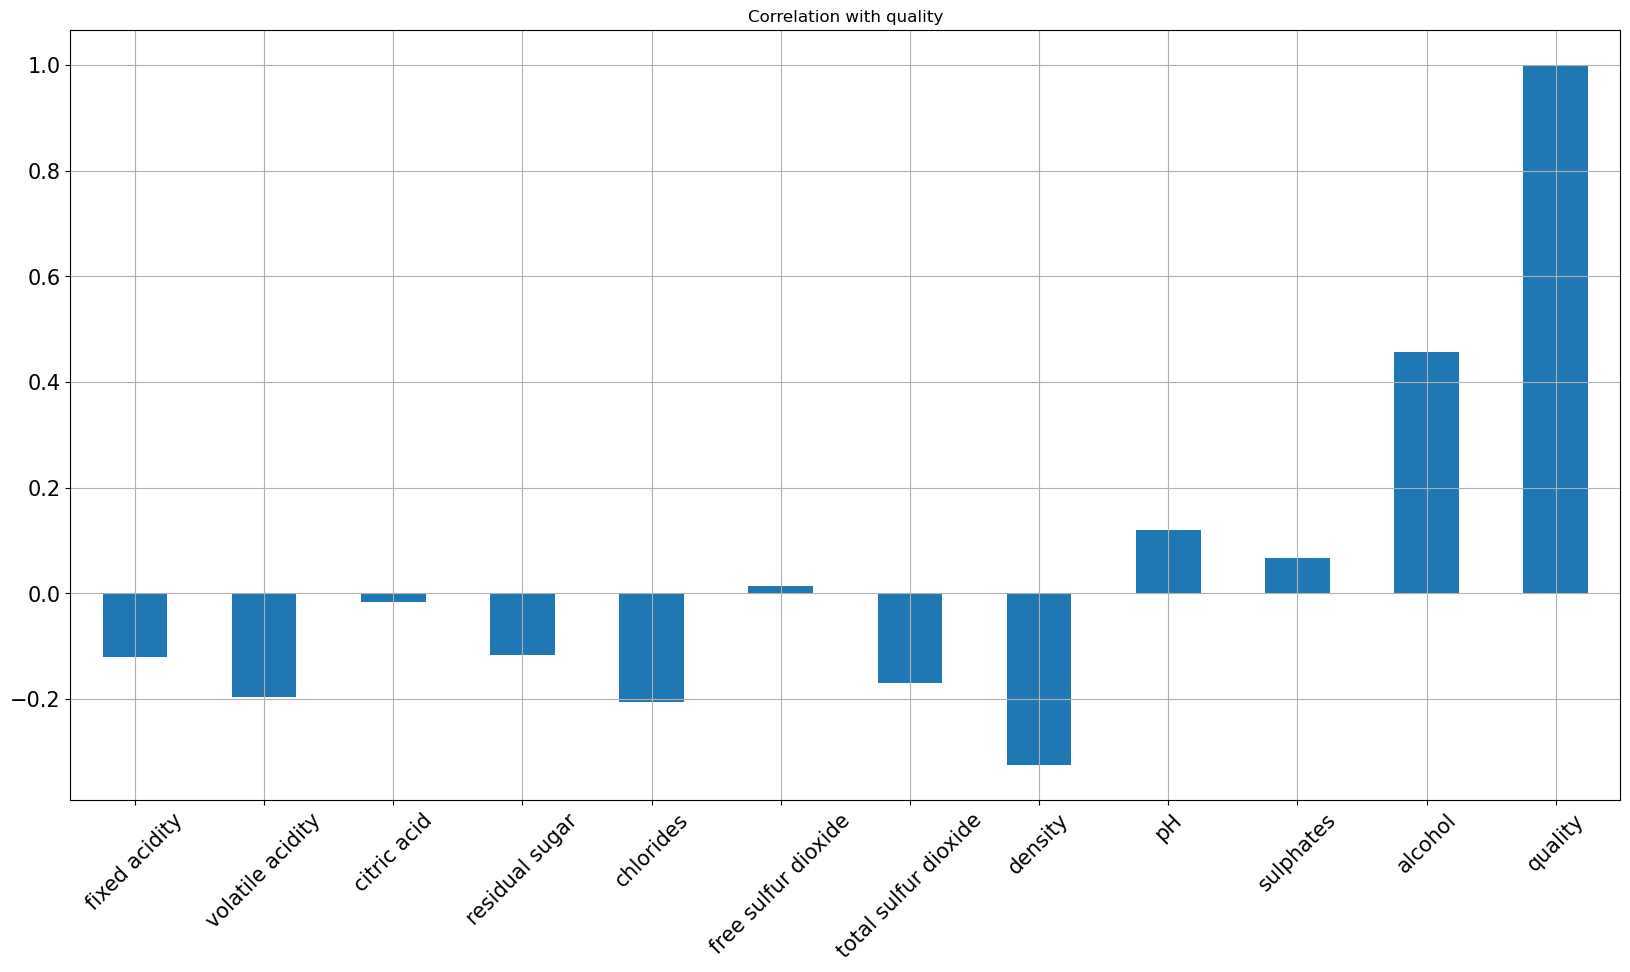

In [25]:
#Correlation with Quality with respect to attributes
wine.corrwith(wine.quality).plot.bar(
    figsize = (20, 10), title = "Correlation with quality", fontsize = 15,
    rot = 45, grid = True
    )


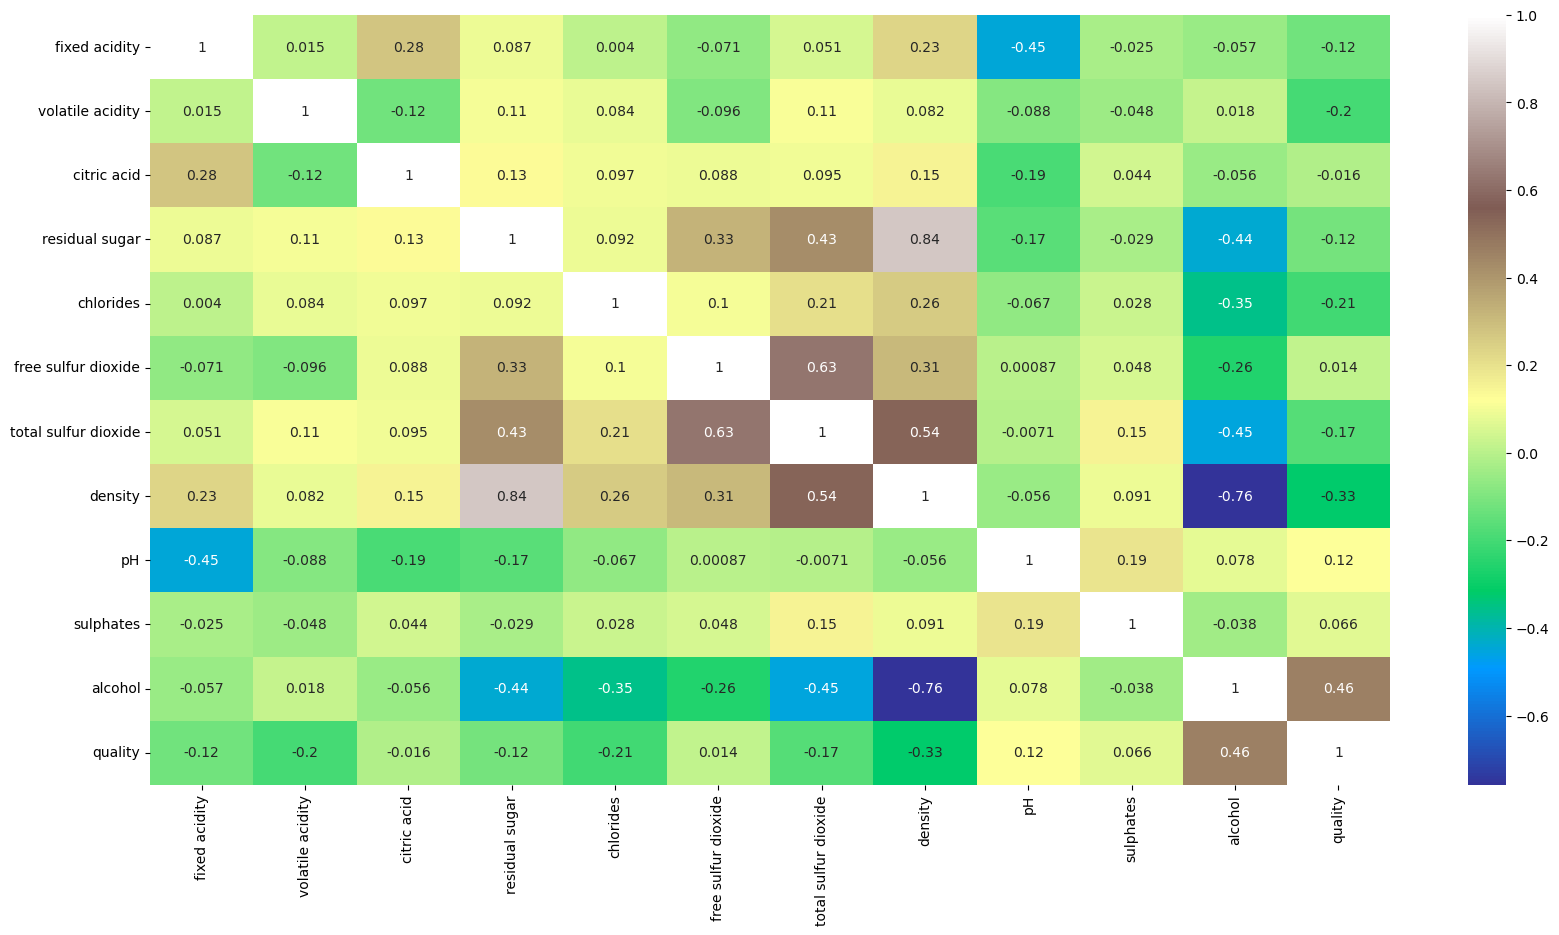

In [26]:
#Check if we need to do Dimentionality reduction
sns.heatmap(wine.corr(),annot=True,cmap='terrain')
figure = plt.gcf()
figure.set_size_inches(20,10)
plt.savefig('figures/heatmap_wine.png', format='png', dpi=300)
plt.show()


In [27]:
wine['quality'].unique()
# Kết quả của cột quality nhiều nhưng ta sẽ chú trọng vào kết quả xác nhận rượu
#có tốt hay không, nên ta sẽ đưa số liệu về dạng nhị phân với 
# 0: không đủ tiêu chuẩn nếu quality < 6.5 và 1: đủ tiêu chuẩn với những trường 
# hợp còn lại.

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [28]:
from sklearn.preprocessing import LabelEncoder
bins = (2, 6.5, 10)
group_names = ['không đủ tiêu chuẩn', 'đủ tiêu chuẩn']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)
label_quality = LabelEncoder()
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [29]:
wine['quality'].value_counts()

quality
0    2770
1     800
Name: count, dtype: int64

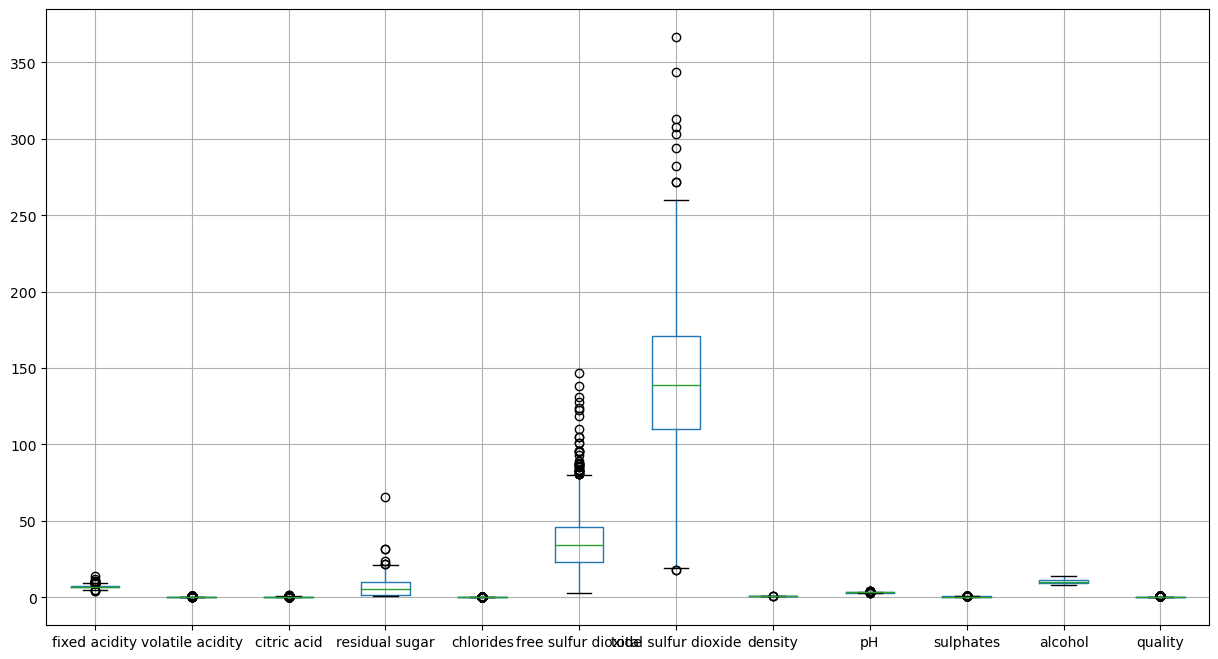

In [30]:
 # Check the outlier using Boxplot
wine.boxplot(figsize=(15,8))
plt.show()

In [31]:
wine['residual sugar'].describe()
# Không loại bỏ các value dị biệt vì nó có thể làm ảnh hưởng đến việc phân loại chất lượng rượu

count    3570.000000
mean        6.329807
std         5.096654
min         0.600000
25%         1.700000
50%         5.100000
75%         9.800000
max        65.800000
Name: residual sugar, dtype: float64

In [35]:
## Partitioning
X = wine.drop('quality',axis=1) #Input data
y = wine['quality']

In [36]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
3565,8.0,0.25,0.27,9.7,0.036,15.0,85.0,0.99406,2.99,0.36,11.2
3566,7.6,0.38,0.28,4.2,0.029,7.0,112.0,0.99060,3.00,0.41,12.6
3567,6.9,0.26,0.27,4.2,0.031,20.0,80.0,0.99089,3.12,0.39,11.5
3568,7.8,0.15,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3


In [37]:
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle = True, random_state = 2)

In [38]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1804,7.6,0.30,0.22,10.2,0.049,57.0,191.0,0.99660,3.08,0.40,9.3
576,8.2,0.23,0.29,1.8,0.047,47.0,187.0,0.99330,3.13,0.50,10.2
1353,6.7,0.18,0.30,6.4,0.048,40.0,251.0,0.99560,3.29,0.52,10.0
1919,7.3,0.22,0.50,13.7,0.049,56.0,189.0,0.99940,3.24,0.66,9.0
3258,7.4,0.19,0.31,14.5,0.045,39.0,193.0,0.99860,3.10,0.50,9.2
...,...,...,...,...,...,...,...,...,...,...,...
2347,7.5,0.23,0.29,2.6,0.031,24.0,98.0,0.99194,3.00,0.54,10.9
1608,6.9,0.27,0.49,23.5,0.057,59.0,235.0,1.00240,2.98,0.47,8.6
2541,9.0,0.26,0.34,6.7,0.029,21.0,162.0,0.99497,3.08,0.50,10.6
2575,6.7,0.17,0.42,10.4,0.038,85.0,182.0,0.99628,3.04,0.44,8.9


In [39]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2356,7.1,0.34,0.32,2.0,0.051,29.0,130.0,0.99354,3.30,0.50,10.4
446,5.8,0.28,0.27,2.6,0.054,30.0,156.0,0.99140,3.53,0.42,12.4
1097,6.3,0.23,0.21,5.1,0.035,29.0,142.0,0.99420,3.36,0.33,10.1
1527,7.9,0.28,0.49,7.7,0.045,48.0,195.0,0.99540,3.04,0.55,11.0
1667,8.8,0.39,0.34,5.9,0.055,33.0,128.0,0.99270,2.95,0.51,11.8
...,...,...,...,...,...,...,...,...,...,...,...
1291,7.5,0.23,0.32,9.2,0.038,54.0,191.0,0.99660,3.04,0.56,9.7
1944,6.0,0.45,0.42,1.1,0.051,61.0,197.0,0.99320,3.02,0.40,9.0
2136,7.9,0.18,0.36,5.9,0.058,31.0,132.0,0.99500,3.25,0.52,10.9
1439,6.1,0.25,0.49,7.6,0.052,67.0,226.0,0.99560,3.16,0.47,8.9


In [40]:
y_train

1804    0
576     0
1353    0
1919    0
3258    0
       ..
2347    0
1608    0
2541    0
2575    0
3240    0
Name: quality, Length: 2856, dtype: int32

In [41]:
y_test

2356    0
446     0
1097    1
1527    0
1667    0
       ..
1291    0
1944    0
2136    0
1439    0
2374    0
Name: quality, Length: 714, dtype: int32

In [42]:
# Nhìn qua dữ liệu ta thấy độ chênh lệch giữa các feature lớn và 
# độ tương quan khá nhỏ nên ta sẽ áp dụng chuẩn hoá

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
X_train

array([[ 0.71816197,  0.24665574, -1.00259644, ..., -0.76353383,
        -0.77127441, -0.94286153],
       [ 1.42577447, -0.44638444, -0.43499759, ..., -0.44031109,
         0.09966327, -0.18680747],
       [-0.34325679, -0.94141314, -0.35391204, ...,  0.59400171,
         0.2738508 , -0.35481949],
       ...,
       [ 2.36925781, -0.14936722, -0.02956984, ..., -0.76353383,
         0.09966327,  0.14921655],
       [-0.34325679, -1.04041888,  0.61911456, ..., -1.02211203,
        -0.42289934, -1.27888555],
       [-0.69706304, -1.13942462,  0.61911456, ..., -0.11708834,
         0.2738508 ,  0.48524057]])

In [45]:
X_test

array([[ 0.12848488,  0.64267869, -0.19174094, ...,  0.65864626,
         0.09966327, -0.01879546],
       [-1.40467554,  0.04864426, -0.59716869, ...,  2.14547089,
        -0.59708687,  1.66132466],
       [-0.81499846, -0.44638444, -1.08368199, ...,  1.04651355,
        -1.38093078, -0.27081348],
       ...,
       [ 1.07196822, -0.94141314,  0.13260126, ...,  0.33542351,
         0.2738508 ,  0.40123457],
       [-1.05086929, -0.24837296,  1.18671341, ..., -0.24637744,
        -0.16161803, -1.27888555],
       [ 0.2464203 , -0.74340166, -0.35391204, ...,  0.65864626,
        -0.68418064,  1.32530063]])

In [46]:

#Using Principal Dimensional Reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
pca.explained_variance_ratio_

array([0.29028409, 0.14932721, 0.11082273, 0.09271288, 0.08709003,
       0.08440547, 0.06755506, 0.04916519, 0.04085999])

In [47]:
pca.explained_variance_ratio_

array([0.29028409, 0.14932721, 0.11082273, 0.09271288, 0.08709003,
       0.08440547, 0.06755506, 0.04916519, 0.04085999])

In [48]:
sum(pca.explained_variance_ratio_)

0.9722226584047495

In [49]:
pca

PCA(n_components=0.95)

In [50]:
X_train

array([[ 2.03697672, -0.19384799, -0.7201155 , ..., -1.16580055,
         0.29813354,  0.06529278],
       [ 0.33222273, -0.46127867,  0.72438272, ..., -1.5047023 ,
         0.99330461, -0.08465162],
       [ 1.33615668,  1.38986335,  0.73138019, ..., -0.60590492,
         0.66739644, -0.17770742],
       ...,
       [ 0.2058522 , -1.97395824,  0.33324117, ..., -1.02255809,
         0.97673199,  0.1668215 ],
       [ 2.52713513,  0.30001962,  1.39475604, ..., -0.38770826,
        -0.74181819, -0.62788364],
       [-1.78460808,  0.07636454,  1.25998519, ...,  0.12144591,
        -0.51312833, -0.54001527]])

In [51]:
##Logictis regression
from sklearn.linear_model import LogisticRegression
lgt = LogisticRegression(solver='lbfgs', max_iter=3000)
lgt.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [52]:
y_predict1 = lgt.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_predict1)
prec = precision_score(y_test, y_predict1, average='weighted', zero_division=0)
rec = recall_score(y_test, y_predict1, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_predict1, average='weighted', zero_division=0)
cm = confusion_matrix(y_test,y_predict1)
results = pd.DataFrame([['Logistic Regression', acc*100, prec, rec, f1]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(results)

                 Model   Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  79.271709   0.769233  0.792717  0.771424


In [53]:
prec

0.7692334990283844

In [54]:
acc

0.7927170868347339

In [55]:
X_test

array([[-0.70757741,  0.26979989, -0.45338555, ...,  0.05966866,
         0.71719756, -0.17565701],
       [-1.900067  ,  2.07494747, -0.39490981, ...,  0.98167106,
         0.79654097,  0.98081457],
       [-0.67154392,  1.06585613, -0.84863419, ..., -0.09539995,
         0.73553064, -0.17129328],
       ...,
       [-0.06319537, -0.46263352,  0.82080432, ..., -0.38415201,
         0.55775808,  0.96491362],
       [ 2.35025448,  0.98143326,  0.98474136, ...,  0.56232242,
        -0.21589314, -1.15857868],
       [-1.11428698,  0.51249121,  0.76671478, ..., -0.33037655,
         1.03625715,  0.61645527]])

In [56]:
## SVC
from sklearn.svm import SVC
svc = SVC(random_state = 0, kernel = 'linear')
svc.fit(X_train,y_train)
y_predict2 = svc.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_predict2)
prec = precision_score(y_test, y_predict2, average='weighted', zero_division=0)
rec = recall_score(y_test, y_predict2, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_predict2, average='weighted', zero_division=0)
cm = confusion_matrix(y_test,y_predict2)
model_results = pd.DataFrame([['SVM (Linear)', acc*100, prec, rec, f1]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results._append(model_results, ignore_index = True)
print(results)

                 Model   Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  79.271709   0.769233  0.792717  0.771424
1         SVM (Linear)  79.831933   0.775342  0.798319  0.763211


In [57]:
## SVC
from sklearn.svm import SVC
svc = SVC(random_state = 0, kernel = 'rbf')
svc.fit(X_train,y_train)
y_predict6 = svc.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_predict6)
prec = precision_score(y_test, y_predict6, average='weighted', zero_division=0)
rec = recall_score(y_test, y_predict6, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_predict6, average='weighted', zero_division=0)
cm = confusion_matrix(y_test,y_predict6)
model_results = pd.DataFrame([['SVM (RBF)', acc*100, prec, rec, f1]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results._append(model_results, ignore_index = True)
print(results)

                 Model   Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  79.271709   0.769233  0.792717  0.771424
1         SVM (Linear)  79.831933   0.775342  0.798319  0.763211
2            SVM (RBF)  81.932773   0.804412  0.819328  0.797292


In [58]:
## KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier()
Knn.fit(X_train,y_train)
y_predict3 = Knn.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_predict3)
prec = precision_score(y_test, y_predict3, average='weighted', zero_division=0)
rec = recall_score(y_test, y_predict3, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_predict3, average='weighted', zero_division=0)
cm = confusion_matrix(y_test,y_predict3)
model_results = pd.DataFrame([['KNeighborsClassifier', acc*100, prec, rec, f1]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results._append(model_results, ignore_index = True)
print(results)

                  Model   Accuracy  Precision    Recall  F1 Score
0   Logistic Regression  79.271709   0.769233  0.792717  0.771424
1          SVM (Linear)  79.831933   0.775342  0.798319  0.763211
2             SVM (RBF)  81.932773   0.804412  0.819328  0.797292
3  KNeighborsClassifier  83.053221   0.823827  0.830532  0.826283


In [59]:
##Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy', min_samples_split=10, splitter='best')
dtc.fit(X_train,y_train)
y_predict4 = dtc.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_predict4)
prec = precision_score(y_test, y_predict4, average='weighted', zero_division=0)
rec = recall_score(y_test, y_predict4, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_predict4, average='weighted', zero_division=0)
cm = confusion_matrix(y_test,y_predict4)
model_results = pd.DataFrame([['DecisionTree', acc*100, prec, rec, f1]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results._append(model_results, ignore_index = True)
print(results)


                  Model   Accuracy  Precision    Recall  F1 Score
0   Logistic Regression  79.271709   0.769233  0.792717  0.771424
1          SVM (Linear)  79.831933   0.775342  0.798319  0.763211
2             SVM (RBF)  81.932773   0.804412  0.819328  0.797292
3  KNeighborsClassifier  83.053221   0.823827  0.830532  0.826283
4          DecisionTree  81.512605   0.817586  0.815126  0.816291


In [60]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 0, n_estimators = 100, criterion = 'entropy')
rfc.fit(X_train,y_train)
y_predict5 = rfc.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_predict5)
prec = precision_score(y_test, y_predict5, average='weighted', zero_division=0)
rec = recall_score(y_test, y_predict5, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_predict5, average='weighted', zero_division=0)
cm = confusion_matrix(y_test,y_predict5)
model_results = pd.DataFrame([['RandomForest', acc*100, prec, rec, f1]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results._append(model_results, ignore_index = True)
print(results)

                  Model   Accuracy  Precision    Recall  F1 Score
0   Logistic Regression  79.271709   0.769233  0.792717  0.771424
1          SVM (Linear)  79.831933   0.775342  0.798319  0.763211
2             SVM (RBF)  81.932773   0.804412  0.819328  0.797292
3  KNeighborsClassifier  83.053221   0.823827  0.830532  0.826283
4          DecisionTree  81.512605   0.817586  0.815126  0.816291
5          RandomForest  86.554622   0.859253  0.865546  0.858917


In [61]:
from sklearn.metrics import classification_report
print('Logistic Regression:')
print(classification_report(y_test, y_predict1))
print('SVM (Linear):')
print(classification_report(y_test, y_predict2))
print('SVM (RBF):')
print(classification_report(y_test, y_predict3))
print('KNeighborsClassifier:')
print(classification_report(y_test, y_predict4))
print('DecisionTree:')
print(classification_report(y_test, y_predict5))
print('RandomForest:')
print(classification_report(y_test, y_predict6))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.93      0.87       551
           1       0.58      0.34      0.43       163

    accuracy                           0.79       714
   macro avg       0.70      0.63      0.65       714
weighted avg       0.77      0.79      0.77       714

SVM (Linear):
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       551
           1       0.65      0.26      0.37       163

    accuracy                           0.80       714
   macro avg       0.73      0.61      0.62       714
weighted avg       0.78      0.80      0.76       714

SVM (RBF):
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       551
           1       0.65      0.56      0.60       163

    accuracy                           0.83       714
   macro avg       0.76      0.74      0.75       714
weighted avg       0.82     

In [62]:
rfc.feature_importances_

array([0.18987465, 0.09133404, 0.10754848, 0.09268922, 0.08897157,
       0.09895189, 0.10100379, 0.08772262, 0.14190374])

In [63]:
# So best current model is Random Forest

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

rf = RandomForestClassifier()
# criterion=["entropy","gini"]
# min_samples_split = range(1,10)
# splitter=['best','random']

parameter = param_grid = [
            {'bootstrap': [True], 'n_estimators': [3, 15, 30], 'max_features': [2, 12, 20, 39]},
            {'bootstrap': [False], 'n_estimators': [3, 5, 10, 20], 'max_features': [2, 6, 10]} ]
cv = RepeatedStratifiedKFold(n_splits=5,random_state=100)
grid_search_cv_rf = GridSearchCV(rf,param_grid=parameter, scoring='accuracy', cv=cv, return_train_score=True, refit=True)


In [69]:
grid_search_cv_rf.fit(X_train,y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=100),
             estimator=RandomForestClassifier(),
             param_grid=[{'bootstrap': [True], 'max_features': [2, 12, 20, 39],
                          'n_estimators': [3, 15, 30]},
                         {'bootstrap': [False], 'max_features': [2, 6, 10],
                          'n_estimators': [3, 5, 10, 20]}],
             return_train_score=True, scoring='accuracy')

In [70]:
grid_search_cv_rf

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=100),
             estimator=RandomForestClassifier(),
             param_grid=[{'bootstrap': [True], 'max_features': [2, 12, 20, 39],
                          'n_estimators': [3, 15, 30]},
                         {'bootstrap': [False], 'max_features': [2, 6, 10],
                          'n_estimators': [3, 5, 10, 20]}],
             return_train_score=True, scoring='accuracy')

In [71]:
joblib.dump(grid_search_cv_rf,'figures/RandomForestRegressor_gridsearch.pkl')

['figures/RandomForestRegressor_gridsearch.pkl']

In [72]:
print(f'Best: {grid_search_cv_rf.best_score_:.3f} using {grid_search_cv_rf.best_params_}')
means = grid_search_cv_rf.cv_results_['mean_test_score']
stds = grid_search_cv_rf.cv_results_['std_test_score']
params = grid_search_cv_rf.cv_results_['params']

for mean,stdev,params in zip(means, stds, params):
    print(f"{mean:.3f}({stdev:.3f}) with: {params}")
print("Training score: ",grid_search_cv_rf.score(X_train,y_train)*100)
print("Testing score: ",grid_search_cv_rf.score(X_test,y_test)*100)

Best: 0.868 using {'bootstrap': True, 'max_features': 2, 'n_estimators': 30}
0.825(0.016) with: {'bootstrap': True, 'max_features': 2, 'n_estimators': 3}
0.862(0.010) with: {'bootstrap': True, 'max_features': 2, 'n_estimators': 15}
0.868(0.011) with: {'bootstrap': True, 'max_features': 2, 'n_estimators': 30}
0.822(0.015) with: {'bootstrap': True, 'max_features': 12, 'n_estimators': 3}
0.857(0.013) with: {'bootstrap': True, 'max_features': 12, 'n_estimators': 15}
0.864(0.011) with: {'bootstrap': True, 'max_features': 12, 'n_estimators': 30}
0.824(0.015) with: {'bootstrap': True, 'max_features': 20, 'n_estimators': 3}
0.859(0.012) with: {'bootstrap': True, 'max_features': 20, 'n_estimators': 15}
0.862(0.013) with: {'bootstrap': True, 'max_features': 20, 'n_estimators': 30}
0.823(0.015) with: {'bootstrap': True, 'max_features': 39, 'n_estimators': 3}
0.858(0.011) with: {'bootstrap': True, 'max_features': 39, 'n_estimators': 15}
0.864(0.012) with: {'bootstrap': True, 'max_features': 39, 'n

In [73]:
new_data = pd.DataFrame({'fixed acidity':5.23,'volatile acidity':0.5,'citric acid':0.1,'residual sugar':8.4,'chlorides':0.04,'free sulfur dioxide':42.2,'total sulfur dioxide':143.6,'density':0.5,'pH':3.1,'sulphates':0.4,'alcohol':12},index=[0])

In [74]:
test = pca.transform(scaler.transform(new_data))

In [75]:
pre=rfc.predict(test)

In [76]:
if pre[0]==1:
    print('good quality wine')
else: print('bad quality wine')

bad quality wine


In [77]:
new_data1 = pd.DataFrame({'fixed acidity':7.3,'volatile acidity':0.23,'citric acid':0.27,'residual sugar':2.6,'chlorides':0.035,'free sulfur dioxide':39,'total sulfur dioxide':120,'density':0.99138,'pH':3.04,'sulphates':0.59,'alcohol':11.3},index=[0])
test1 = pca.transform(scaler.transform(new_data1))
p1=rfc.predict(test1)
if p1[0]==1:
    print('good quality wine')
else: print('bad quality wine')

good quality wine


In [78]:
# test_set = joblib.load(r'./models/RandomForestRegressor_model.pkl')

D:\Workspace\Python\miniconda3\envs\mlclass\Lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.1.3 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
D:\Workspace\Python\miniconda3\envs\mlclass\Lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 1.1.3 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
